There is a nice discussion that is intuitive and easy to follow on Metropolis-Hastings Algorithm on [Wikipedia](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm). [Here](http://galton.uchicago.edu/~eichler/stat24600/Handouts/l12.pdf) are some more nice notes on MH. Simulated Annealing, a method inspired my Metropolis-Hastings Algorithm is also discussed here.

The pseudo code for Metropolis-Hastings Algorithm is discussed below --

* Initialize $x_0$.
    * For $i = 1 \text{ to } N-1$
        * Sample $u \sim \mathcal{U}_{[0, 1]}$
        * Sample $x^{*} \sim q(x|x^{(i)})$
        * If $u < \mathcal{A}(x^(i), x^*) = \min\{\frac{p(x^*)q(x^{(i)}|x^*)}{p(x^{(i)})q(x^*|x^{(i)})}\}$
            * $x^{i+1} = x^{*}$
        * else
            * $x^{i+1} = x^{(i)}$

In [1]:
# Import the required modules
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Expected Value of x  = 4.01284026674 with variance = 11.4278689915


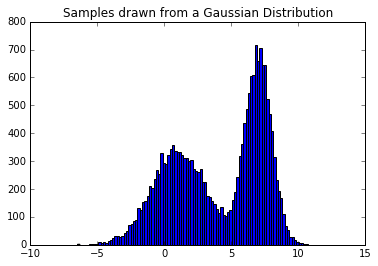

In [2]:
# Let's sample a random distribution and plot the histogram of the samples
x = np.hstack((np.random.normal(7, 1, 10000), np.random.normal(1, 2, 10000)))
print('Expected Value of x  = {} with variance = {}'.format(np.mean(x), np.var(x)))
plt.hist(x, bins=100)
plt.title('Samples drawn from a Gaussian Distribution')
plt.show()

In [3]:
# This function returns the unnormalized probabilites 
def p(x):
    return (norm(7, 1).pdf(x) + norm(1, 2).pdf(x))/2

# Initialize x_0
x = 5
# Number of samples
N = 10000
# I think when we are not sure
# we should keep the `sigma` as large
# as possible, so that we sample the entire space
sigma = 100
# List of sampled points
x_sampled = []
for i in range(N-1):
    # `u` lies in [0, 1]
    u = np.random.uniform()
    # Sample `x_star` from a gaussian distribution centered around `x`
    x_star = norm(x, sigma).rvs()
    if u < min(1, (p(x_star)*norm(x_star, sigma).pdf(x))/(p(x)*norm(x, sigma).pdf(x_star))):
        x = x_star
    x_sampled.append(x)

Expected Value of x  = 4.08718070983 with variance = 11.2499887046


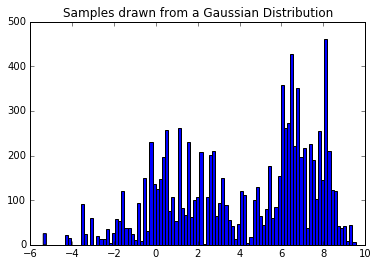

In [4]:
# Plot the sampled distribution
print('Expected Value of x  = {} with variance = {}'.format(np.mean(x_sampled), np.var(x_sampled)))
plt.hist(x_sampled, bins=100)
plt.title('Samples drawn from a Gaussian Distribution')
plt.show()